In [2]:

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
# DATA FILES

price_files = ["bittensor_token_price.csv", "fetchai_token_price.csv",
               "numerai_token_price.csv", "oceanprotocol_token_price.csv",
               "oraichain_token_price.csv", "singularitynet_token_price.csv"]

commits_mapping = {
    "bittensor_commits.json": "TAO",
    "fetchai_commits.json": "FET",
    "numerai_commits.json": "NMR", 
    "oceanprotocol_commits.json": "OCEAN",
    "oraichain_commits.json": "ORAI",
    "singularitynet_commits.json": "AGIX"
}

issues_mapping = {
    "bittensor_issues.json": "TAO",
    "fetchai_issues.json": "FET",
    "numerai_issues.json": "NMR", 
    "oceanprotocol_issues.json": "OCEAN",
    "oraichain_issues.json": "ORAI",
    "singularitynet_issues.json": "AGIX"
}

repos_mapping = {
    "bittensor_repos.json": "TAO",
    "fetchai_repos.json": "FET",
    "numerai_repos.json": "NMR", 
    "oceanprotocol_repos.json": "OCEAN",
    "oraichain_repos.json": "ORAI",
    "singularitynet_repos.json": "AGIX"
}

tokens = ["TAO", "FET", "NMR",
          "OCEAN", "ORAI", "AGIX"]



In [97]:
def get_commits(token, mapping):
    for k, v in mapping.items():
        if token == v:
            filename = f'github_data/{k}'
            with open(filename) as commits_file:
                parsed_json = json.load(commits_file)
            
            commits_rows = [row for sublist in parsed_json for row in sublist]
            commits_df = pd.DataFrame(commits_rows)
            return commits_df
    return f'No commit data for token {token}'

def get_issues(token, mapping):
    for k, v in mapping.items():
        if token == v:
            filename = f'github_data/{k}'
            with open(filename) as issues_files:
                parsed_json = json.load(issues_files)
            
            issues_rows = [row for sublist in parsed_json for row in sublist]
            issues_df = pd.DataFrame(issues_rows)
            return issues_df
    return f'No gh issues data for token {token}'

def get_repos(token, mapping):
    for k, v in mapping.items():
        if token == v:
            filename = f'github_data/{k}'
            with open(filename) as repos_file:
                parsed_json = json.load(repos_file)
            
            repos_rows = [row for row in parsed_json]
            repo_df = pd.DataFrame(repos_rows)
            return repo_df
    return f'No repo data for token {token}'



In [98]:
def get_commit_trends(commits_df):
    flat_commit = pd.json_normalize(commits_df['commit'])
    commits_df = pd.concat([commits_df, flat_commit], axis=1)
    commits_df.drop(columns=['commit'], inplace=True)

    commits_df['author.date'] = pd.to_datetime(commits_df['author.date']).dt.date

    date_counts = pd.DataFrame()

    date_counts['commit_count'] = commits_df['author.date'].value_counts()

    
    # Reset index to make the date a column
    date_counts = date_counts.reset_index()
    date_counts.columns = ['date', 'commit_count']

    # Convert 'date' column to datetime
    date_counts['date'] = pd.to_datetime(date_counts['date'])
    date_counts['year'] = pd.to_datetime(date_counts['date']).dt.year
    print(date_counts.describe())

    # Set 'date' column as the index
    date_counts.set_index('date', inplace=True)

    # Resample into daily intervals and fill missing dates with zeros
    daily_counts = date_counts.asfreq('D', fill_value=0)

    # Resample into monthly and quarterly intervals
    yearly_counts = date_counts.resample('Y').sum()
    monthly_counts = date_counts.resample('M').sum()
    quarterly_counts = date_counts.resample('Q').sum()

    return daily_counts, yearly_counts, monthly_counts, quarterly_counts

def get_issues_trends(issues_df):
    issues_df['created_at'] = pd.to_datetime(issues_df['created_at']).dt.date
    issues_df['updated_at'] = pd.to_datetime(issues_df['updated_at']).dt.date
    issues_df['closed_at'] = pd.to_datetime(issues_df['closed_at']).dt.date
    issues_df['Year'] = pd.to_datetime(issues_df['created_at']).dt.year
    # Create a new DataFrame to store the counts for each date
    date_counts = pd.DataFrame()

    # Count the occurrences of dates in each column separately
    date_counts['created_count'] = issues_df['created_at'].value_counts()
    date_counts['updated_count'] = issues_df['updated_at'].value_counts()
    date_counts['closed_count'] = issues_df['closed_at'].value_counts()

    # Reset index to make the date a column
    date_counts = date_counts.reset_index()

    # Rename the columns for clarity
    date_counts.columns = ['date', 'created_count', 'updated_count', 'closed_count']

    # Convert 'date' column to datetime
    date_counts['date'] = pd.to_datetime(date_counts['date'])
    date_counts['year'] = pd.to_datetime(date_counts['date']).dt.year
    print(date_counts.describe())


    # Set 'date' column as the index
    date_counts.set_index('date', inplace=True)

    # Resample into daily intervals and fill missing dates with zeros
    daily_counts = date_counts.asfreq('D', fill_value=0)

    # Resample into monthly and quarterly intervals
    yearly_counts = date_counts.resample('Y').sum()
    monthly_counts = date_counts.resample('M').sum()
    quarterly_counts = date_counts.resample('Q').sum()

    return daily_counts, yearly_counts, monthly_counts, quarterly_counts

def get_repos_trends(repos_df):
    repos_df['created_at'] = pd.to_datetime(repos_df['created_at']).dt.date
    repos_df['updated_at'] = pd.to_datetime(repos_df['updated_at']).dt.date
    # Create a new DataFrame to store the counts for each date
    date_counts = pd.DataFrame()

    # Count the occurrences of dates in each column separately
    date_counts['created_count'] = repos_df['created_at'].value_counts()
    date_counts['updated_count'] = repos_df['updated_at'].value_counts()    

    # Reset index to make the date a column
    date_counts = date_counts.reset_index()

    # Rename the columns for clarity
    date_counts.columns = ['date', 'created_count', 'updated_count']

    # Convert 'date' column to datetime
    date_counts['date'] = pd.to_datetime(date_counts['date'])
    date_counts['year'] = pd.to_datetime(date_counts['date']).dt.year
    print(date_counts.describe())

    # Set 'date' column as the index
    date_counts.set_index('date', inplace=True)

    # Resample into daily intervals and fill missing dates with zeros
    daily_counts = date_counts.asfreq('D', fill_value=0)

    # Resample into monthly and quarterly intervals
    yearly_counts = date_counts.resample('Y').sum()
    monthly_counts = date_counts.resample('M').sum()
    quarterly_counts = date_counts.resample('Q').sum()

    return daily_counts, yearly_counts, monthly_counts, quarterly_counts
    



In [99]:
def plot_issues_data(daily_counts, yearly_counts, monthly_counts, quarterly_counts, token):
    # Plotting
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Daily trends
    axs[0, 0].plot(daily_counts.index, daily_counts['created_count'], label='Created', color='blue')
    axs[0, 0].plot(daily_counts.index, daily_counts['updated_count'], label='Updated', color='green')
    axs[0, 0].plot(daily_counts.index, daily_counts['closed_count'], label='Closed', color='red')
    axs[0, 0].set_title('Daily Developer Issues Activity Trends')
    axs[0, 0].set_xlabel('Date')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].legend()
    axs[0, 0].grid(True)
    axs[0, 0].tick_params(axis='x', rotation=45)

    # Yearly trends
    axs[0, 1].plot(yearly_counts.index, yearly_counts['created_count'], label='Created', color='blue')
    axs[0, 1].plot(yearly_counts.index, yearly_counts['updated_count'], label='Updated', color='green')
    axs[0, 1].plot(yearly_counts.index, yearly_counts['closed_count'], label='Closed', color='red')
    axs[0, 1].set_title('Yearly Developer Issues Activity Trends')
    axs[0, 1].set_xlabel('Date')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].legend()
    axs[0, 1].grid(True)
    axs[0, 1].tick_params(axis='x', rotation=45)
    axs[0, 1].set_xlim(date_counts.index.min(), date_counts.index.max())

    # Monthly trends
    axs[1, 0].plot(monthly_counts.index, monthly_counts['created_count'], label='Created', color='blue')
    axs[1, 0].plot(monthly_counts.index, monthly_counts['updated_count'], label='Updated', color='green')
    axs[1, 0].plot(monthly_counts.index, monthly_counts['closed_count'], label='Closed', color='red')
    axs[1, 0].set_title('Monthly Developer Issues Activity Trends')
    axs[1, 0].set_xlabel('Date')
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].legend()
    axs[1, 0].grid(True)
    axs[1, 0].tick_params(axis='x', rotation=45)
    axs[1, 0].set_xlim(date_counts.index.min(), date_counts.index.max())

    # Quarterly trends
    axs[1, 1].plot(quarterly_counts.index, quarterly_counts['created_count'], label='Created', color='blue')
    axs[1, 1].plot(quarterly_counts.index, quarterly_counts['updated_count'], label='Updated', color='green')
    axs[1, 1].plot(quarterly_counts.index, quarterly_counts['closed_count'], label='Closed', color='red')
    axs[1, 1].set_title('Quarterly Developer Issues Activity Trends')
    axs[1, 1].set_xlabel('Date')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].legend()
    axs[1, 1].grid(True)
    axs[1, 1].tick_params(axis='x', rotation=45)
    axs[1, 1].set_xlim(date_counts.index.min(), date_counts.index.max())

    fig.suptitle(f"Developer's Issues Trends for Token {token}")

    plt.tight_layout()
    plt.show()


def plot_commits_data(daily_counts, yearly_counts, monthly_counts, quarterly_counts, token):

    # Plotting
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Daily trends
    axs[0, 0].plot(daily_counts.index, daily_counts['commit_count'], label='Created', color='blue')
    axs[0, 0].set_title('Daily Developer Commits Activity Trends')
    axs[0, 0].set_xlabel('Date')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].legend()
    axs[0, 0].grid(True)
    axs[0, 0].tick_params(axis='x', rotation=45)

    # Yearly trends
    axs[0, 1].plot(yearly_counts.index, yearly_counts['commit_count'], label='Created', color='blue')
    axs[0, 1].set_title('Yearly Developer Commits Activity Trends')
    axs[0, 1].set_xlabel('Date')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].legend()
    axs[0, 1].grid(True)
    axs[0, 1].tick_params(axis='x', rotation=45)
    axs[0, 1].set_xlim(date_counts.index.min(), date_counts.index.max())

    # Monthly trends
    axs[1, 0].plot(monthly_counts.index, monthly_counts['commit_count'], label='Created', color='blue')
    axs[1, 0].set_title('Monthly Developer Commits Activity Trends')
    axs[1, 0].set_xlabel('Date')
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].legend()
    axs[1, 0].grid(True)
    axs[1, 0].tick_params(axis='x', rotation=45)
    axs[1, 0].set_xlim(date_counts.index.min(), date_counts.index.max())

    # Quarterly trends
    axs[1, 1].plot(quarterly_counts.index, quarterly_counts['commit_count'], label='Created', color='blue')
    axs[1, 1].set_title('Quarterly Developer Commits Activity Trends')
    axs[1, 1].set_xlabel('Date')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].legend()
    axs[1, 1].grid(True)
    axs[1, 1].tick_params(axis='x', rotation=45)
    axs[1, 1].set_xlim(date_counts.index.min(), date_counts.index.max())

    fig.suptitle(f"Developer's Commits Trends for Token {token}")

    plt.tight_layout()
    plt.show()

In [100]:

def plot_repos_data(daily_counts, yearly_counts, monthly_counts, quarterly_counts, token):
    # Plotting
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Daily trends
    axs[0, 0].plot(daily_counts.index, daily_counts['created_count'], label='Created', color='blue')
    axs[0, 0].plot(daily_counts.index, daily_counts['updated_count'], label='Updated', color='green')
    axs[0, 0].set_title('Daily Developer Repositories Activity Trends')
    axs[0, 0].set_xlabel('Date')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].legend()
    axs[0, 0].grid(True)
    axs[0, 0].tick_params(axis='x', rotation=45)

    # Yearly trends
    axs[0, 1].plot(yearly_counts.index, yearly_counts['created_count'], label='Created', color='blue')
    axs[0, 1].plot(yearly_counts.index, yearly_counts['updated_count'], label='Updated', color='green')
    axs[0, 1].set_title('Yearly Developer Repositories Activity Trends')
    axs[0, 1].set_xlabel('Date')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].legend()
    axs[0, 1].grid(True)
    axs[0, 1].tick_params(axis='x', rotation=45)
    axs[0, 1].set_xlim(date_counts.index.min(), date_counts.index.max())

    # Monthly trends
    axs[1, 0].plot(monthly_counts.index, monthly_counts['created_count'], label='Created', color='blue')
    axs[1, 0].plot(monthly_counts.index, monthly_counts['updated_count'], label='Updated', color='green')
    axs[1, 0].set_title('Monthly Developer Repositories Activity Trends')
    axs[1, 0].set_xlabel('Date')
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].legend()
    axs[1, 0].grid(True)
    axs[1, 0].tick_params(axis='x', rotation=45)
    axs[1, 0].set_xlim(date_counts.index.min(), date_counts.index.max())

    # Quarterly trends
    axs[1, 1].plot(quarterly_counts.index, quarterly_counts['created_count'], label='Created', color='blue')
    axs[1, 1].plot(quarterly_counts.index, quarterly_counts['updated_count'], label='Updated', color='green')
    axs[1, 1].set_title('Quarterly Developer Repositories Activity Trends')
    axs[1, 1].set_xlabel('Date')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].legend()
    axs[1, 1].grid(True)
    axs[1, 1].tick_params(axis='x', rotation=45)
    axs[1, 1].set_xlim(date_counts.index.min(), date_counts.index.max())

    fig.suptitle(f"Developer's Repositories Trends for Token {token}")

    plt.tight_layout()
    plt.show()

***Trends of TAO***


       commit_count         year
count   2120.000000  2120.000000
mean      11.794811  2020.758019
std       11.607384     1.822318
min        1.000000  2017.000000
25%        4.000000  2019.000000
50%        9.000000  2021.000000
75%       15.250000  2022.000000
max      126.000000  2024.000000


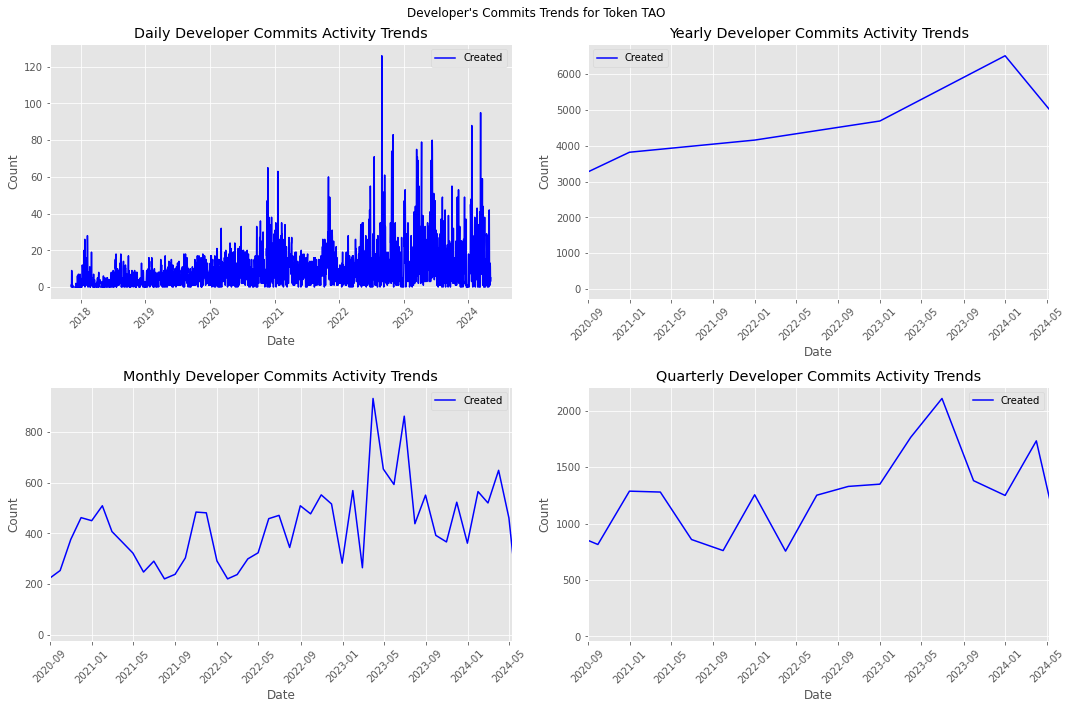

       created_count  updated_count  closed_count         year
count     853.000000     528.000000    666.000000   853.000000
mean        3.954279       6.227273      4.519520  2022.237984
std         4.122425      19.275429      4.567661     1.161132
min         1.000000       1.000000      1.000000  2020.000000
25%         1.000000       1.000000      2.000000  2021.000000
50%         3.000000       3.000000      3.000000  2022.000000
75%         5.000000       5.000000      6.000000  2023.000000
max        33.000000     283.000000     40.000000  2024.000000


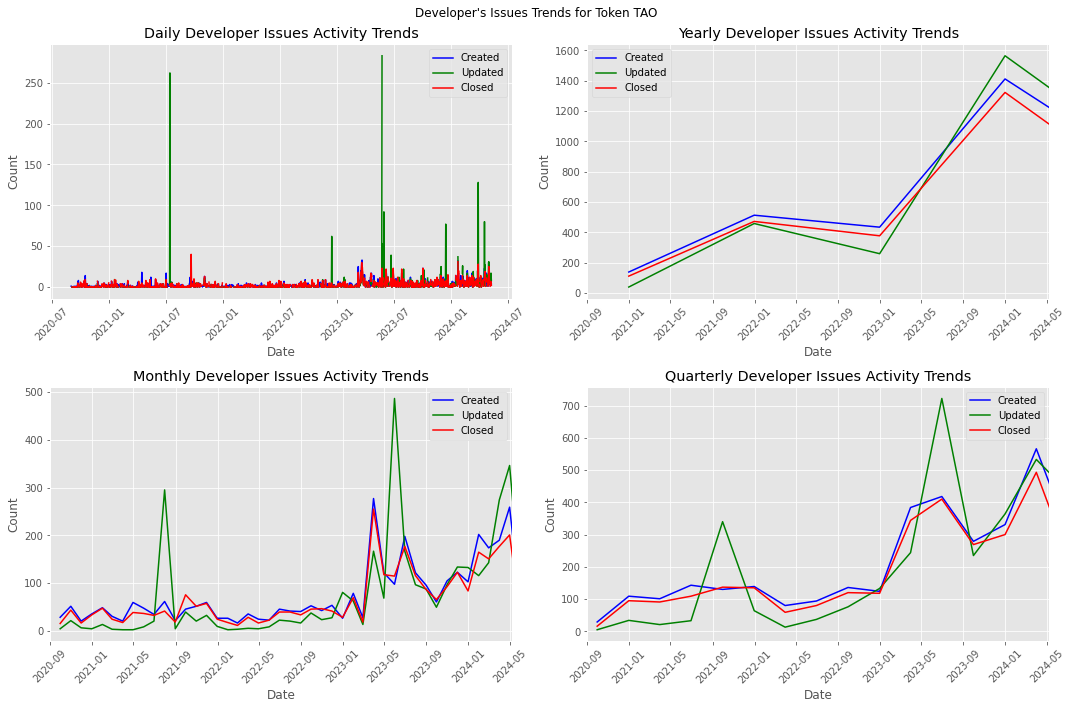

       created_count  updated_count        year
count      28.000000            1.0    28.00000
mean        1.107143            1.0  2022.50000
std         0.314970            NaN     0.96225
min         1.000000            1.0  2020.00000
25%         1.000000            1.0  2022.00000
50%         1.000000            1.0  2022.50000
75%         1.000000            1.0  2023.00000
max         2.000000            1.0  2024.00000


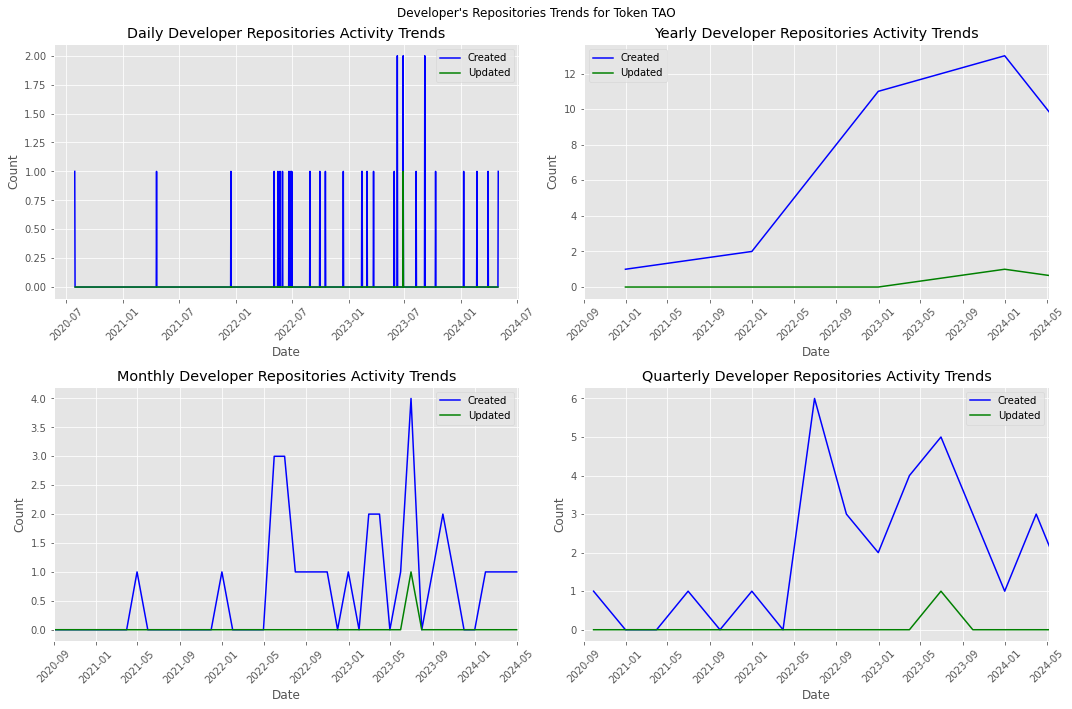

***Trends of FET***


       commit_count         year
count   2532.000000  2532.000000
mean      17.548183  2018.740521
std       17.499643     2.449048
min        1.000000  2014.000000
25%        4.000000  2017.000000
50%       11.000000  2019.000000
75%       27.000000  2021.000000
max      115.000000  2024.000000


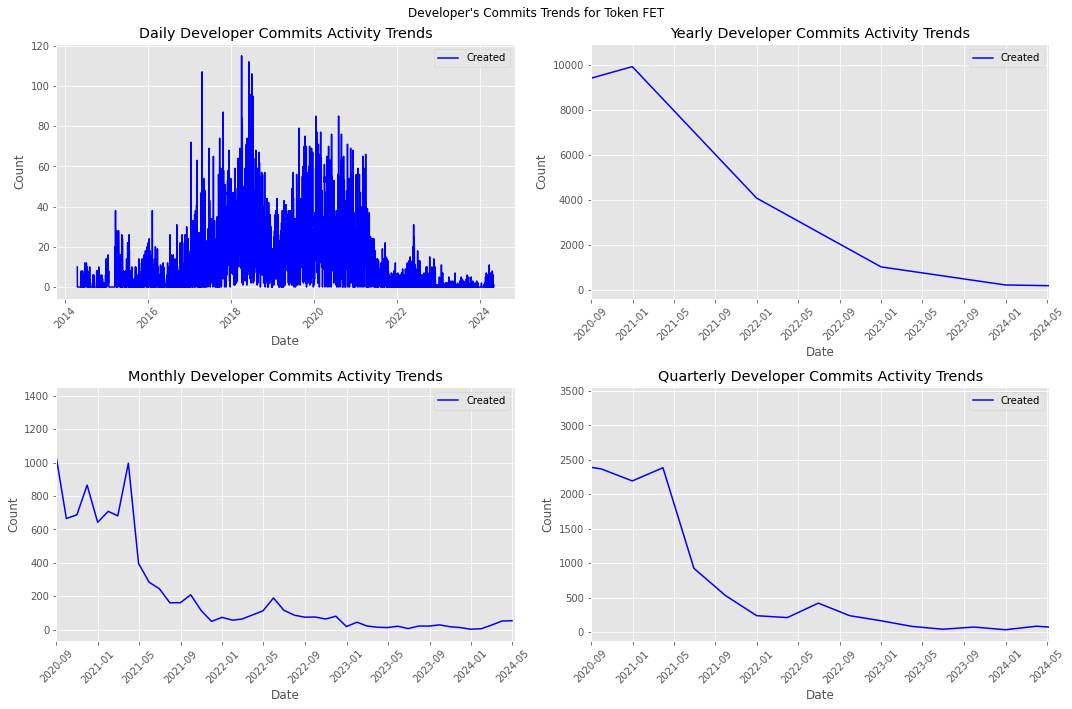

       created_count  updated_count  closed_count         year
count    1626.000000    1288.000000   1350.000000  1626.000000
mean        5.663592       7.003882      6.382963  2020.626691
std         5.130001      33.905910      9.620255     1.668606
min         1.000000       1.000000      1.000000  2018.000000
25%         2.000000       2.000000      2.000000  2019.000000
50%         4.000000       4.000000      4.000000  2020.500000
75%         8.000000       7.000000      9.000000  2022.000000
max        39.000000    1137.000000    295.000000  2024.000000


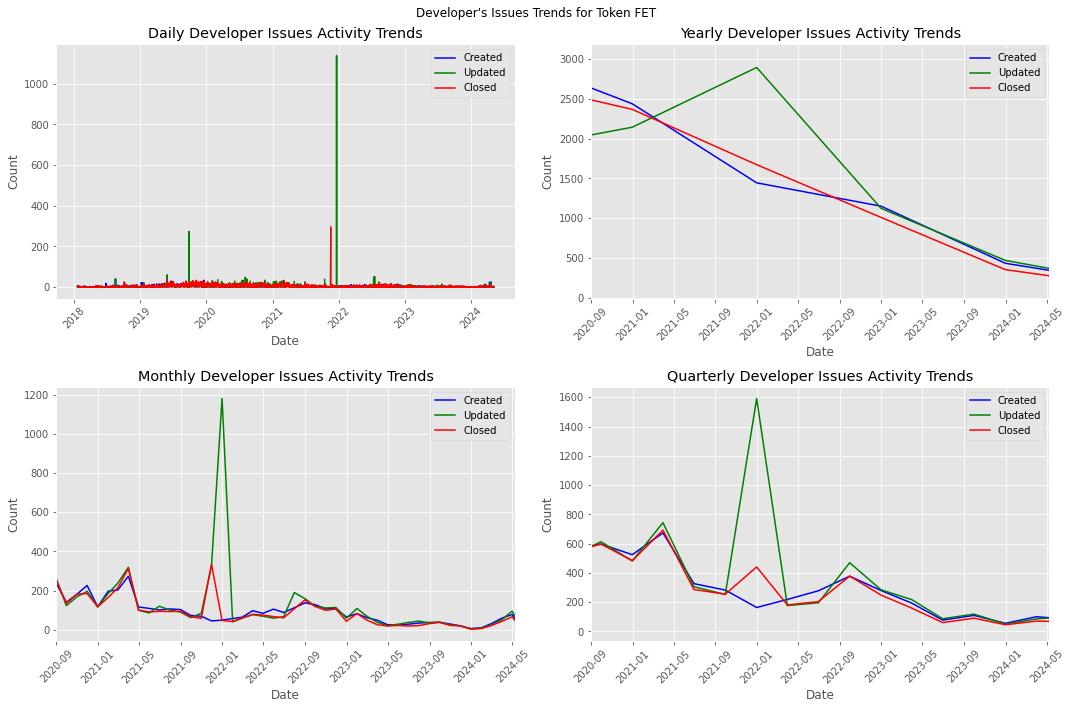

       created_count  updated_count         year
count      55.000000            3.0    55.000000
mean        1.036364            1.0  2020.472727
std         0.188919            0.0     1.537850
min         1.000000            1.0  2018.000000
25%         1.000000            1.0  2019.000000
50%         1.000000            1.0  2020.000000
75%         1.000000            1.0  2021.000000
max         2.000000            1.0  2024.000000


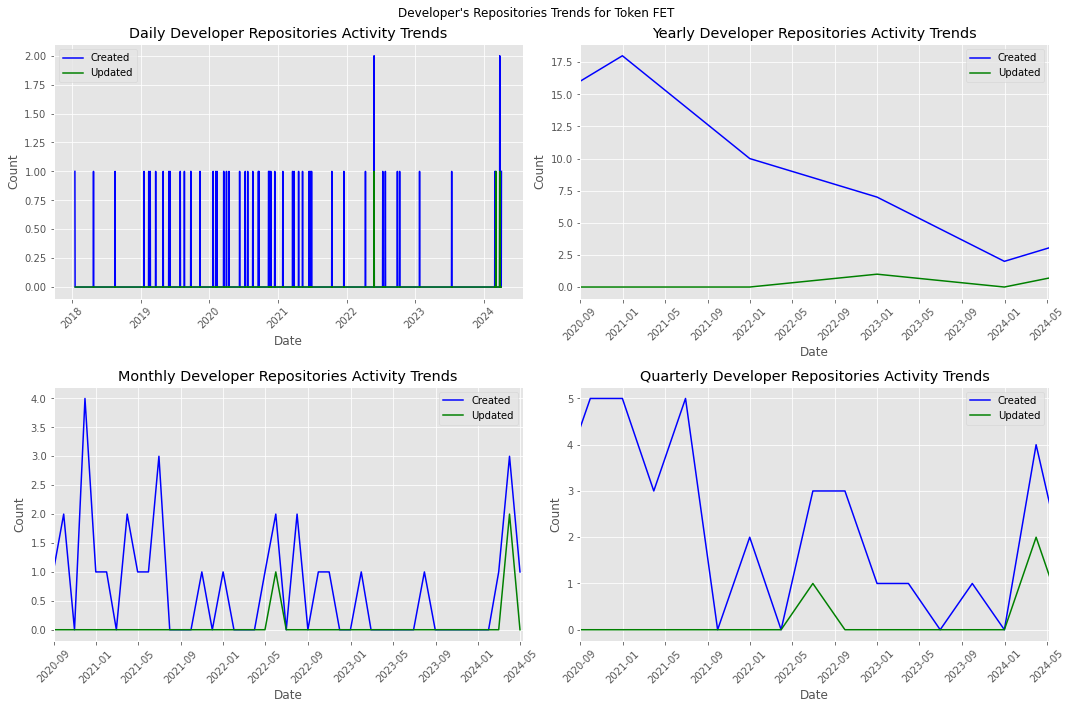

***Trends of NMR***


       commit_count         year
count    737.000000   737.000000
mean       3.705563  2019.890095
std        4.563130     2.203042
min        1.000000  2011.000000
25%        1.000000  2018.000000
50%        2.000000  2020.000000
75%        4.000000  2021.000000
max       62.000000  2024.000000


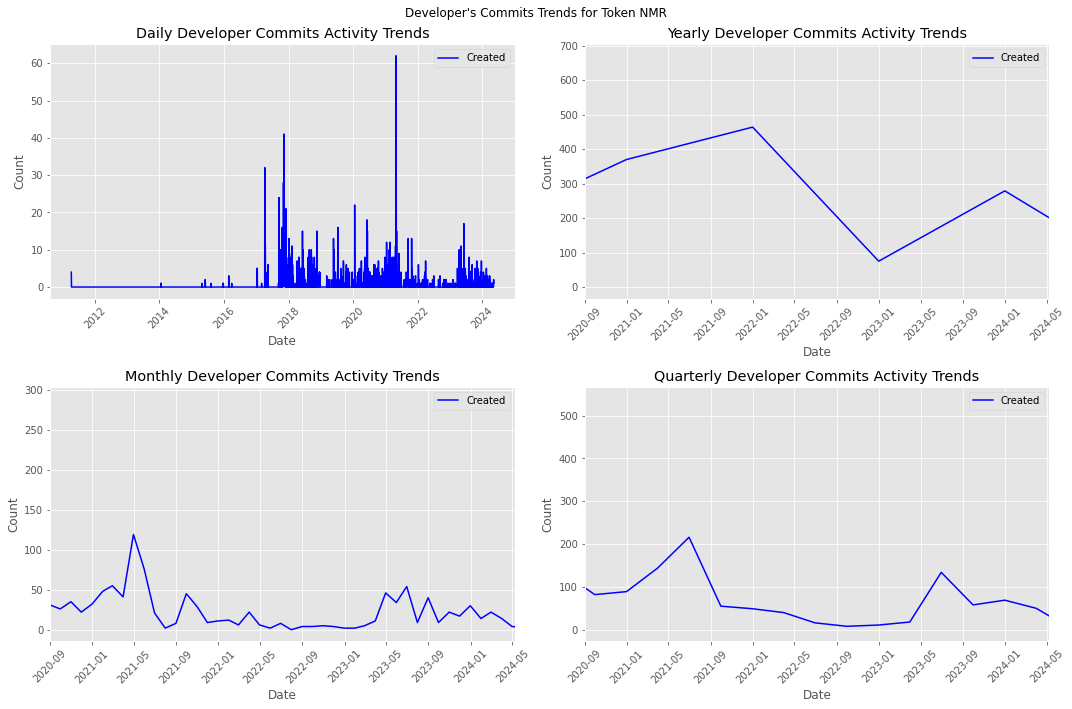

       created_count  updated_count  closed_count         year
count     388.000000     239.000000    199.000000   388.000000
mean        1.530928       1.983264      1.989950  2020.605670
std         1.449074       1.883066      1.696669     2.037546
min         1.000000       1.000000      1.000000  2017.000000
25%         1.000000       1.000000      1.000000  2019.000000
50%         1.000000       1.000000      1.000000  2021.000000
75%         2.000000       2.000000      2.000000  2022.000000
max        17.000000      12.000000      9.000000  2024.000000


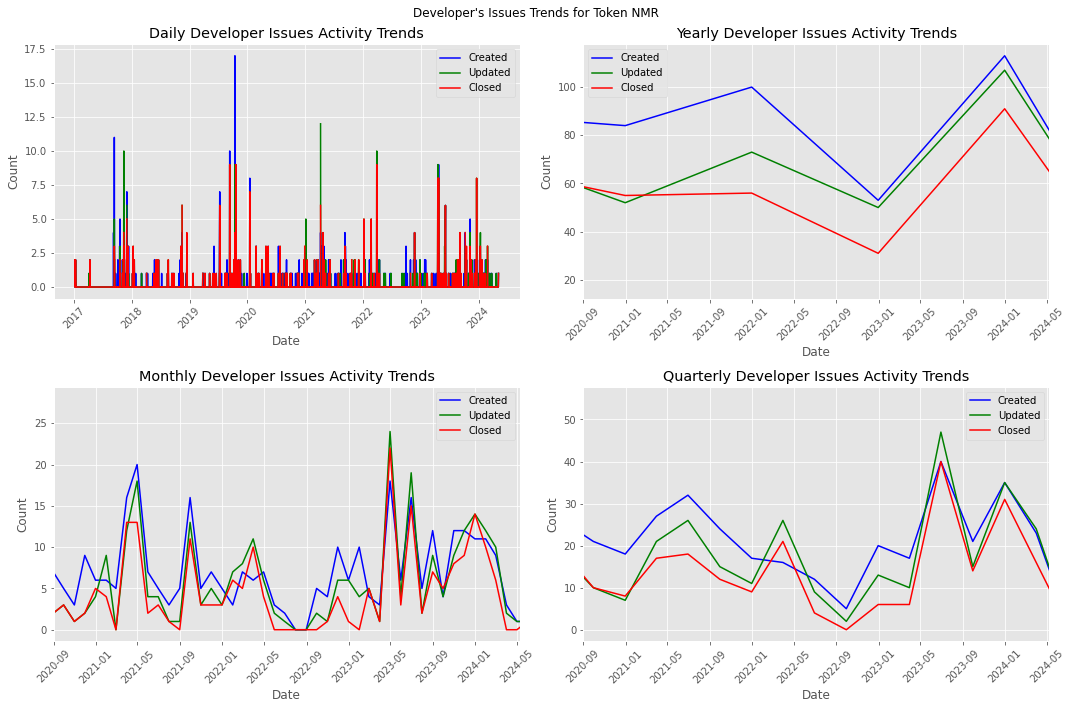

       created_count  updated_count         year
count      20.000000            1.0    20.000000
mean        1.050000            6.0  2019.850000
std         0.223607            NaN     2.433862
min         1.000000            6.0  2017.000000
25%         1.000000            6.0  2017.000000
50%         1.000000            6.0  2019.500000
75%         1.000000            6.0  2022.250000
max         2.000000            6.0  2023.000000


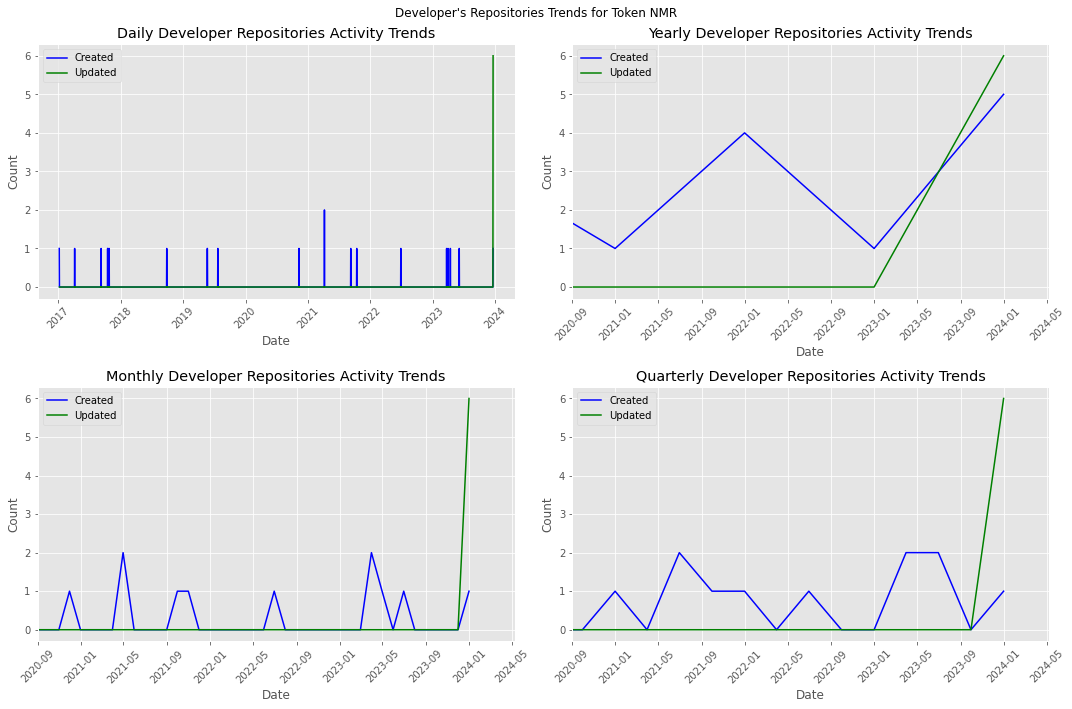

***Trends of OCEAN***


       commit_count         year
count   1755.000000  1755.000000
mean      20.536752  2020.937892
std       20.827088     1.685377
min        1.000000  2018.000000
25%        5.000000  2020.000000
50%       14.000000  2021.000000
75%       29.000000  2022.000000
max      155.000000  2024.000000


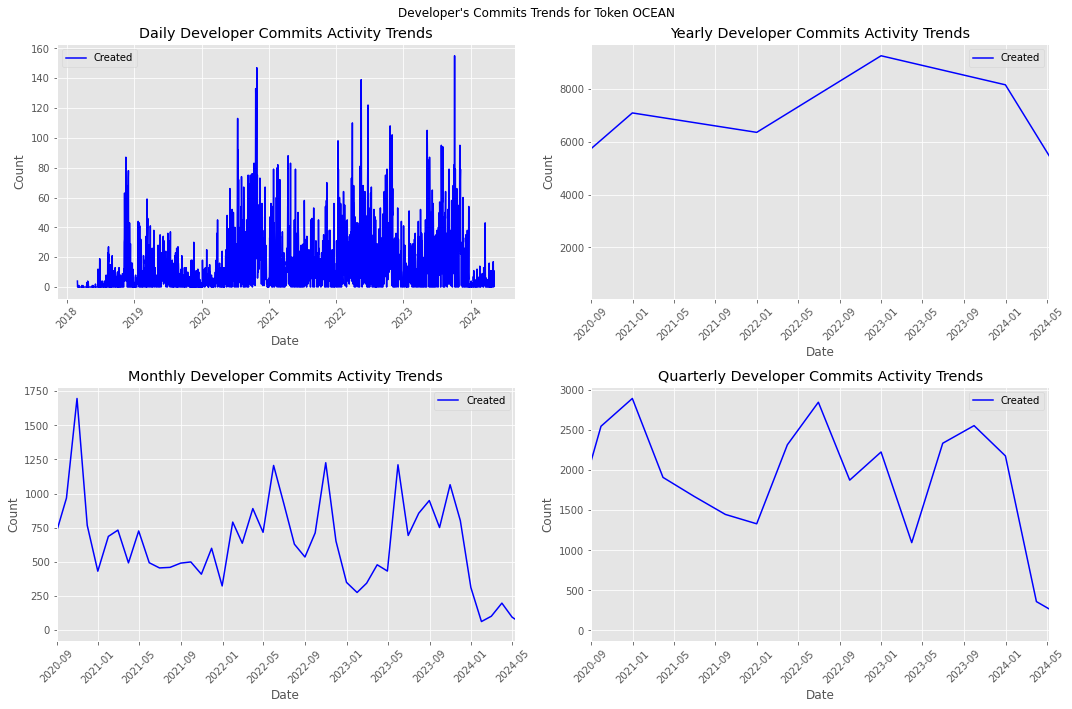

       created_count  updated_count  closed_count         year
count    1622.000000    1379.000000   1418.000000  1622.000000
mean       10.936498      12.778825     12.062764  2021.159679
std        10.071933      13.693184     10.815493     1.675686
min         1.000000       1.000000      1.000000  2018.000000
25%         3.000000       4.000000      4.000000  2020.000000
50%         8.000000      10.000000      9.000000  2021.000000
75%        16.000000      18.000000     17.000000  2023.000000
max        65.000000     299.000000     82.000000  2024.000000


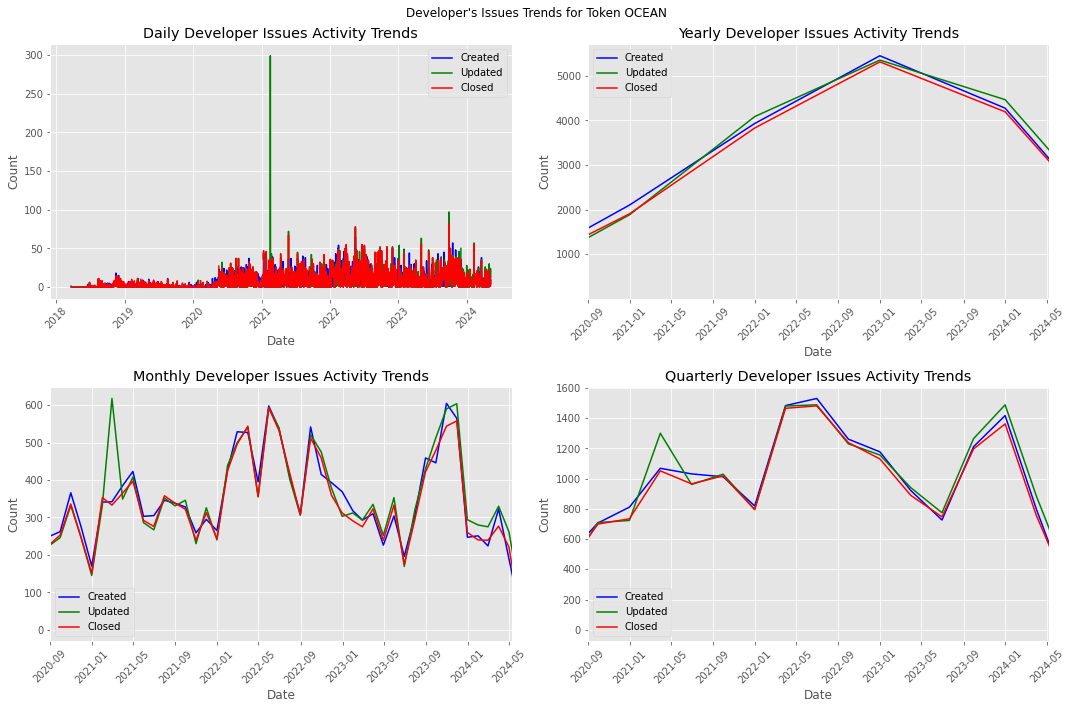

       created_count  updated_count         year
count      73.000000           10.0    73.000000
mean        1.109589            1.0  2021.315068
std         0.426928            0.0     1.809517
min         1.000000            1.0  2018.000000
25%         1.000000            1.0  2020.000000
50%         1.000000            1.0  2022.000000
75%         1.000000            1.0  2023.000000
max         4.000000            1.0  2024.000000


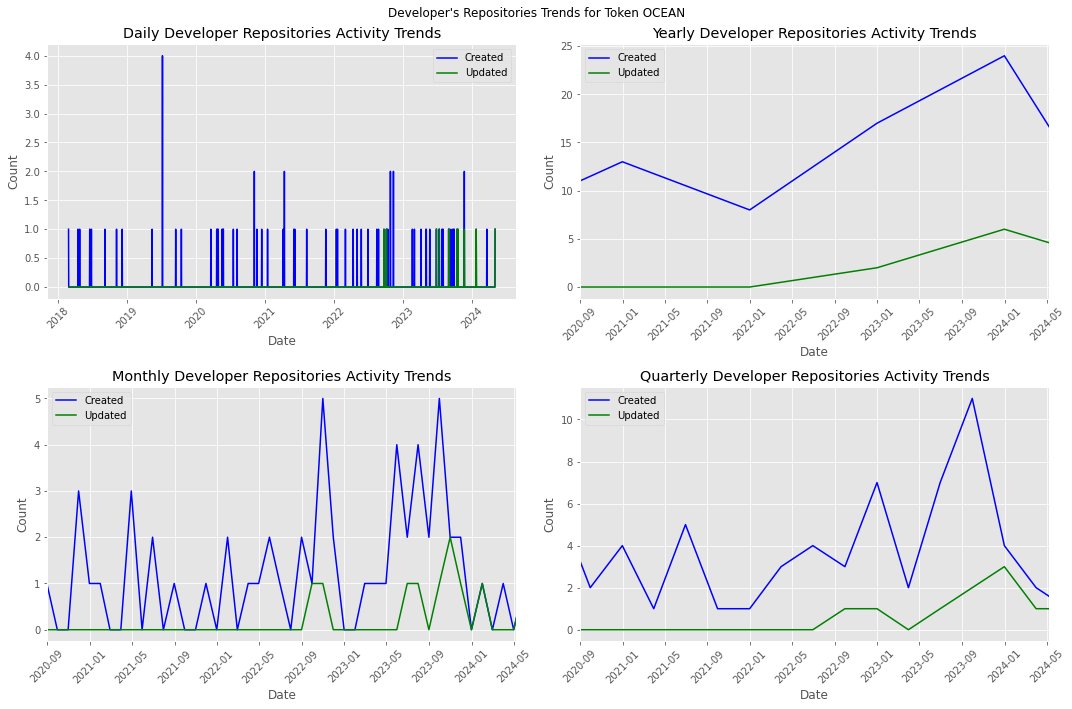

***Trends of ORAI***


       commit_count         year
count   1605.000000  1605.000000
mean      14.131464  2021.221807
std       13.432041     1.686280
min        1.000000  2017.000000
25%        4.000000  2020.000000
50%       10.000000  2021.000000
75%       21.000000  2023.000000
max      105.000000  2024.000000


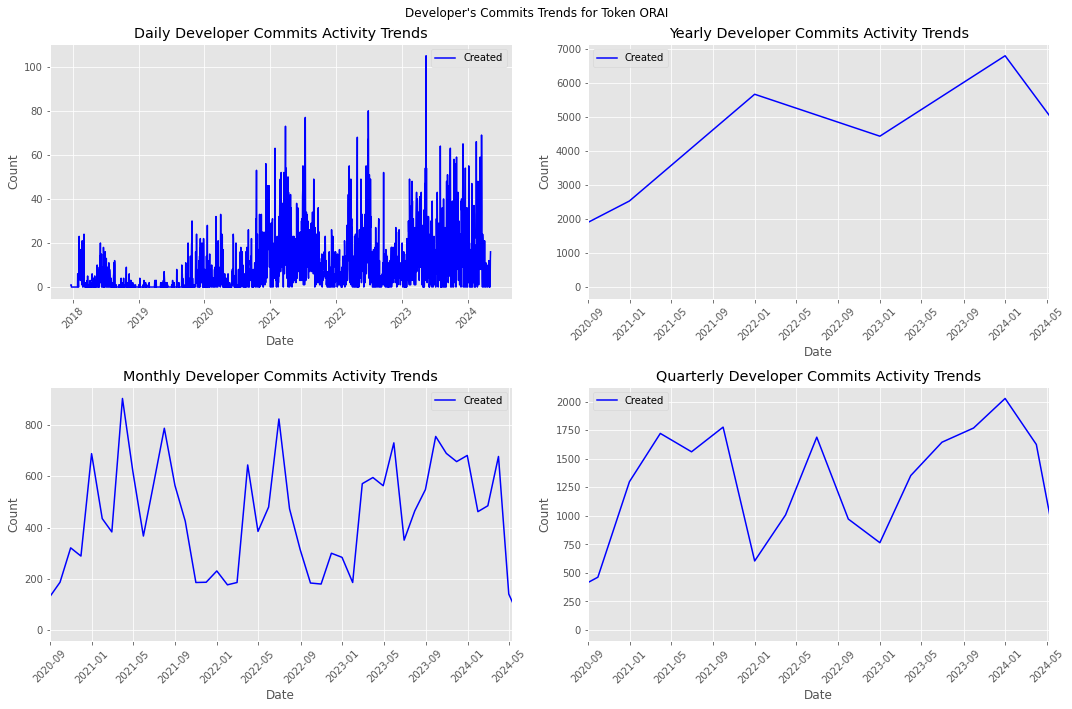

       created_count  updated_count  closed_count         year
count     795.000000     635.000000    732.000000   795.000000
mean        3.589937       4.404724      3.785519  2022.250314
std         3.106084      15.545445      3.276022     1.088749
min         1.000000       1.000000      1.000000  2020.000000
25%         1.000000       1.000000      1.000000  2021.000000
50%         3.000000       2.000000      3.000000  2022.000000
75%         5.000000       4.000000      5.000000  2023.000000
max        19.000000     360.000000     22.000000  2024.000000


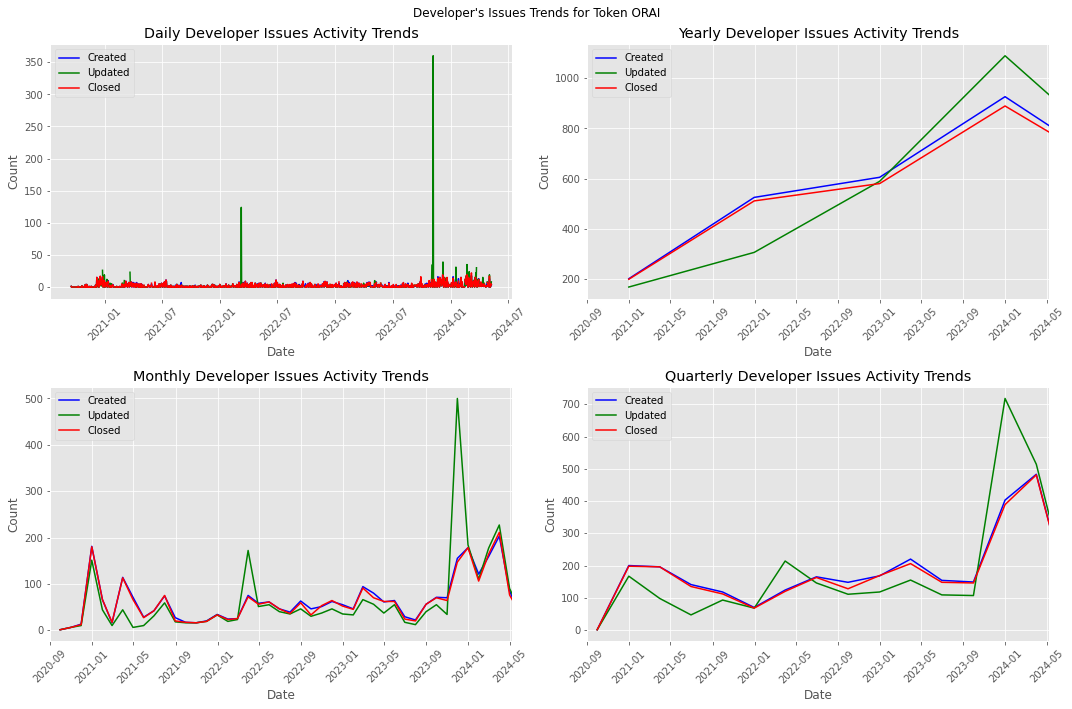

       created_count  updated_count         year
count     106.000000      27.000000   106.000000
mean        1.122642       1.407407  2022.056604
std         0.357314       0.797074     1.102639
min         1.000000       1.000000  2020.000000
25%         1.000000       1.000000  2021.000000
50%         1.000000       1.000000  2022.000000
75%         1.000000       1.500000  2023.000000
max         3.000000       4.000000  2024.000000


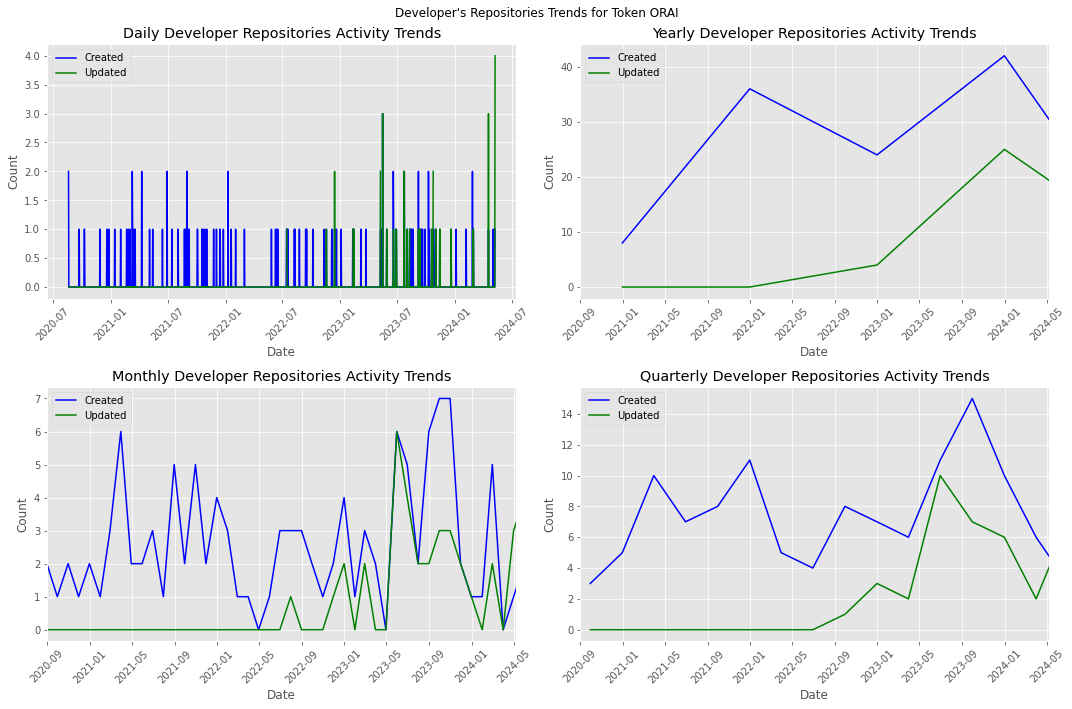

***Trends of AGIX***


       commit_count         year
count   1764.000000  1764.000000
mean      15.948980  2020.387755
std       18.544414     1.885367
min        1.000000  2017.000000
25%        4.000000  2019.000000
50%        9.000000  2020.000000
75%       21.000000  2022.000000
max      165.000000  2024.000000


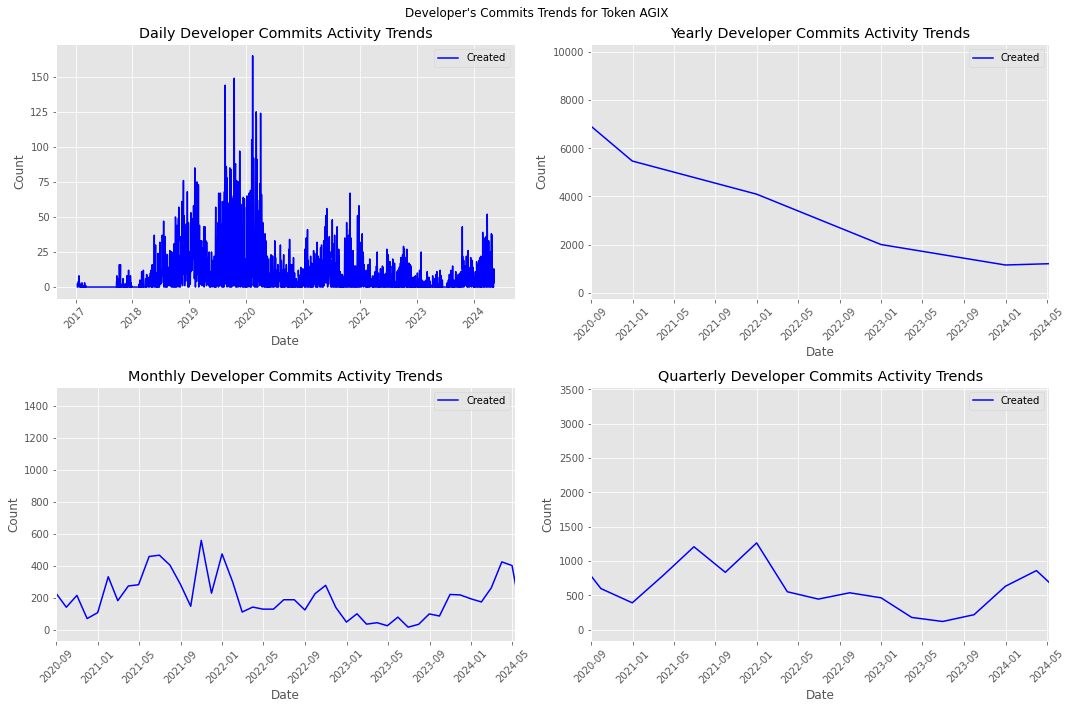

       created_count  updated_count  closed_count         year
count    1512.000000    1379.000000   1329.000000  1512.000000
mean        6.187169       6.677302      6.224229  2020.605159
std         6.354102       7.219320      6.574479     1.794041
min         1.000000       1.000000      1.000000  2017.000000
25%         2.000000       2.000000      2.000000  2019.000000
50%         4.000000       4.000000      4.000000  2021.000000
75%         8.000000       9.000000      8.000000  2022.000000
max        57.000000      65.000000     60.000000  2024.000000


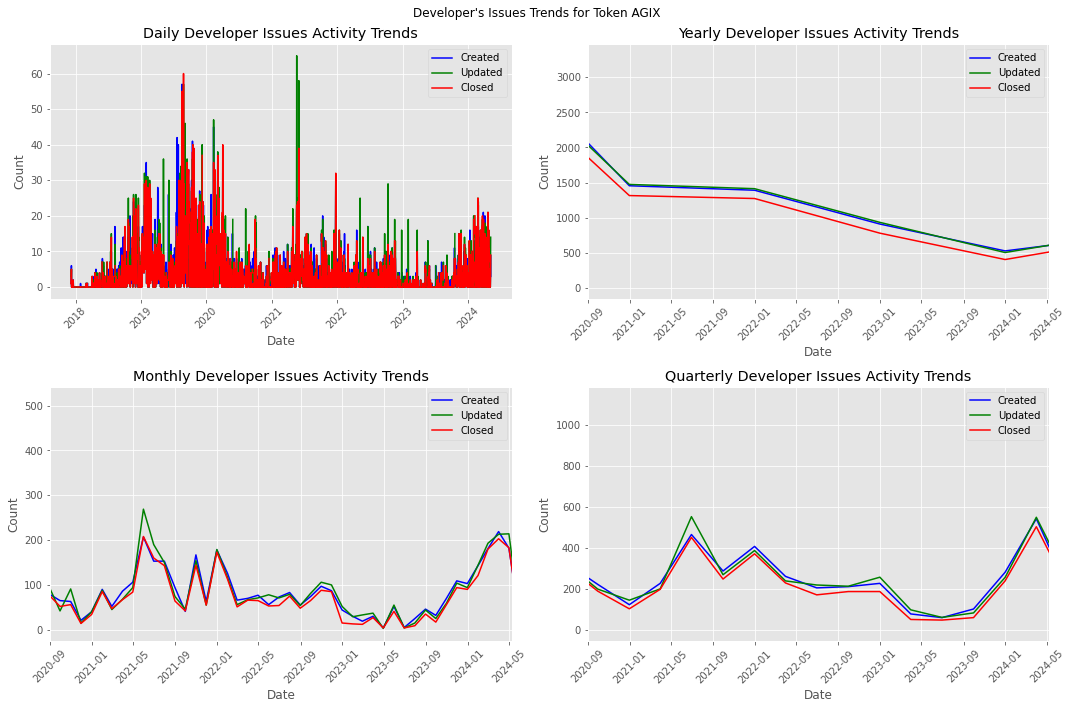

       created_count  updated_count         year
count     108.000000           18.0   108.000000
mean        1.157407            1.0  2020.157407
std         0.532356            0.0     2.005423
min         1.000000            1.0  2017.000000
25%         1.000000            1.0  2018.000000
50%         1.000000            1.0  2020.000000
75%         1.000000            1.0  2021.250000
max         4.000000            1.0  2024.000000


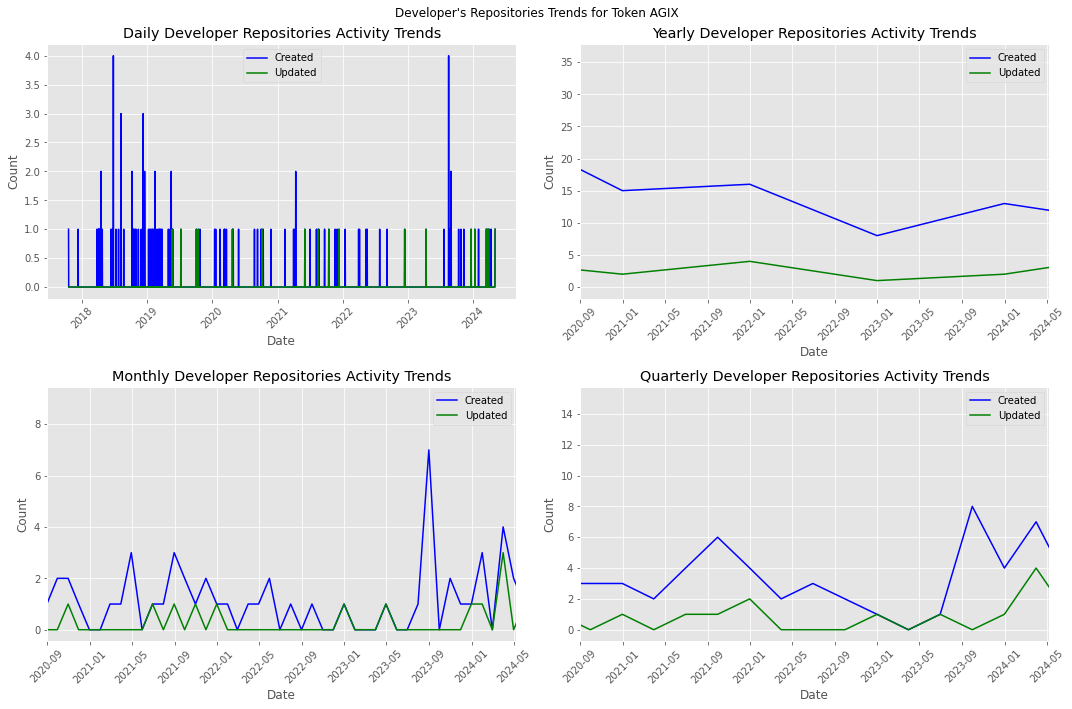

In [129]:
for i, token in enumerate(tokens):
    print(f'***Trends of {token}***\n\n')
    commit_data = get_commits(token, commits_mapping)
    issues_data = get_issues(token, issues_mapping)
    repos_data = get_repos(token, repos_mapping)

    daily_counts, yearly_counts, monthly_counts, quarterly_counts = get_commit_trends(commit_data)
    plot_commits_data(daily_counts, yearly_counts, monthly_counts, quarterly_counts, token)
    daily_counts, yearly_counts, monthly_counts, quarterly_counts = get_issues_trends(issues_data)
    plot_issues_data(daily_counts, yearly_counts, monthly_counts, quarterly_counts, token)
    daily_counts, yearly_counts, monthly_counts, quarterly_counts = get_repos_trends(repos_data)
    plot_repos_data(daily_counts, yearly_counts, monthly_counts, quarterly_counts, token)